In [1]:
import torch, intel_extension_for_pytorch as ipex
from torch import nn
import matplotlib.pyplot as plt

J:\Coding\Codes\python\deepLearning\.venv\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: ''If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
weight = 0.09 # 'b' from linear regression formula
bias = 0.3 # 'a' term in the formula

# create data
start, end, step = -2, 2, 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
#X = torch.rand(50, 1)
y = weight * X * X + bias

X[:10], y[:10]

(tensor([[-2.0000],
         [-1.9800],
         [-1.9600],
         [-1.9400],
         [-1.9200],
         [-1.9000],
         [-1.8800],
         [-1.8600],
         [-1.8400],
         [-1.8200]]),
 tensor([[0.6600],
         [0.6528],
         [0.6457],
         [0.6387],
         [0.6318],
         [0.6249],
         [0.6181],
         [0.6114],
         [0.6047],
         [0.5981]]))

In [3]:
trainSplit = int(0.8 * len(X))
trainSplit

160

In [4]:
X_train, y_train = X[:trainSplit], y[:trainSplit]
X_test, y_test = X[trainSplit:], y[trainSplit:]

len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

In [5]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10, 7))
    
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="r", s=4, label = "Training data")
    
    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Test data")
    
    #check if there are predictions
    if predictions is not None:
        # plot predictions if they exist
        plt.scatter(test_data, predictions, c="y", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14})

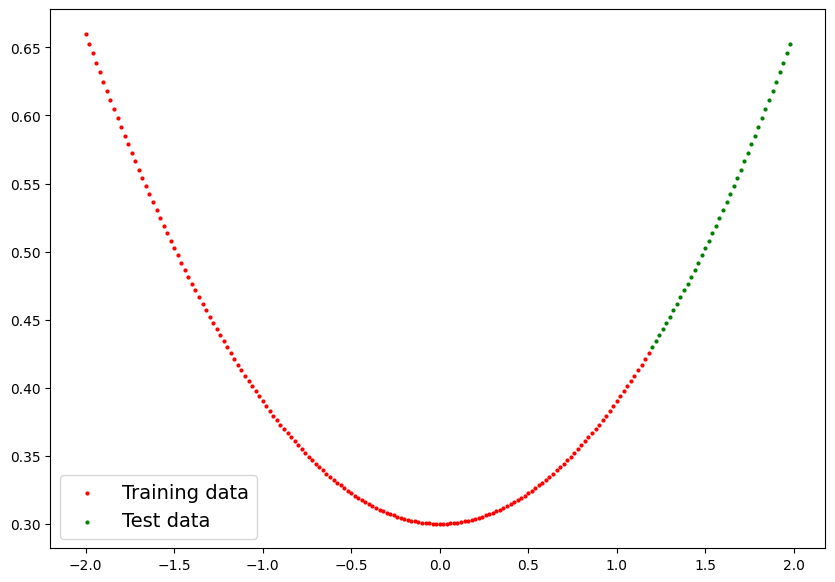

In [6]:
plot_predictions()

In [7]:
class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
        
    # forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'x' is the input data/training data
        return self.weights * x * x + self.bias # linear regression formula

In [8]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters()) 

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.6136],
        [0.6299],
        [0.6465],
        [0.6633],
        [0.6804],
        [0.6978],
        [0.7155],
        [0.7334],
        [0.7516],
        [0.7700],
        [0.7887],
        [0.8077],
        [0.8270],
        [0.8465],
        [0.8663],
        [0.8864],
        [0.9067],
        [0.9273],
        [0.9482],
        [0.9693],
        [0.9907],
        [1.0124],
        [1.0344],
        [1.0566],
        [1.0791],
        [1.1018],
        [1.1249],
        [1.1482],
        [1.1717],
        [1.1956],
        [1.2197],
        [1.2441],
        [1.2687],
        [1.2936],
        [1.3188],
        [1.3443],
        [1.3700],
        [1.3960],
        [1.4222],
        [1.4488]])

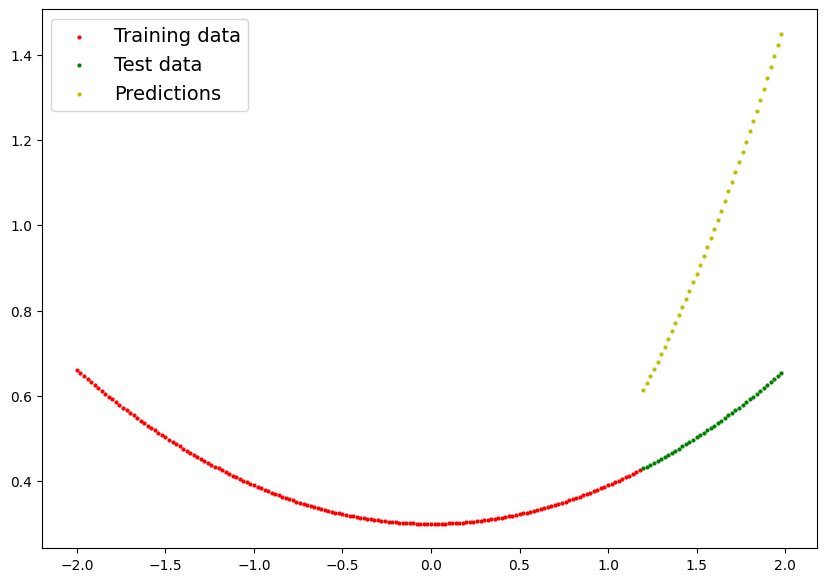

In [11]:
plot_predictions(predictions=y_preds)

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
#loss_fn = nn.SmoothL1Loss()
#loss_fn = nn.L1Loss()
loss_fn = nn.MSELoss()
loss_fn

MSELoss()

In [14]:
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.0001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [15]:
epochs = 20000

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 
    
    model_0.eval()
    with torch.inference_mode(): 
        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred, y_test)
        
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
        
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss; {test_loss}")   
    
    print(model_0.state_dict())

Loss: 0.07688634097576141
Epoch: 0 | Loss: 0.07688634097576141 | Test loss; 0.24952566623687744
OrderedDict([('weights', tensor([0.3366])), ('bias', tensor([0.1288]))])
Loss: 0.07682963460683823
Epoch: 1 | Loss: 0.07682963460683823 | Test loss; 0.24931442737579346
OrderedDict([('weights', tensor([0.3365])), ('bias', tensor([0.1288]))])
Loss: 0.0767730101943016
Epoch: 2 | Loss: 0.0767730101943016 | Test loss; 0.2491033971309662
OrderedDict([('weights', tensor([0.3365])), ('bias', tensor([0.1288]))])
Loss: 0.07671644538640976
Epoch: 3 | Loss: 0.07671644538640976 | Test loss; 0.24889254570007324
OrderedDict([('weights', tensor([0.3364])), ('bias', tensor([0.1287]))])
Loss: 0.07665993273258209
Epoch: 4 | Loss: 0.07665993273258209 | Test loss; 0.2486819475889206
OrderedDict([('weights', tensor([0.3363])), ('bias', tensor([0.1287]))])
Loss: 0.0766034871339798
Epoch: 5 | Loss: 0.0766034871339798 | Test loss; 0.24847154319286346
OrderedDict([('weights', tensor([0.3362])), ('bias', tensor([0.12

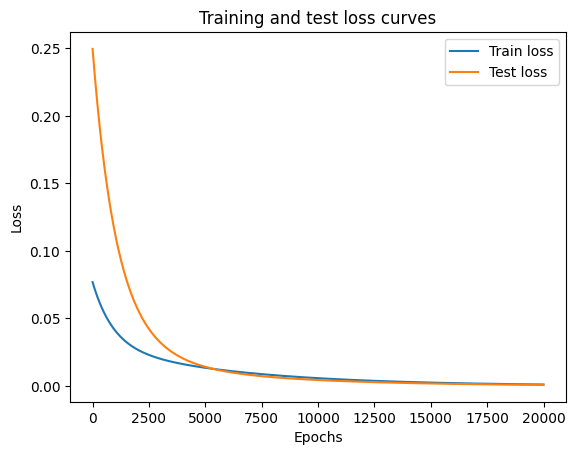

In [16]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title('Training and test loss curves')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [17]:
test_loss_values

[tensor(0.2495),
 tensor(0.2493),
 tensor(0.2491),
 tensor(0.2489),
 tensor(0.2487),
 tensor(0.2485),
 tensor(0.2483),
 tensor(0.2481),
 tensor(0.2478),
 tensor(0.2476),
 tensor(0.2474),
 tensor(0.2472),
 tensor(0.2470),
 tensor(0.2468),
 tensor(0.2466),
 tensor(0.2464),
 tensor(0.2462),
 tensor(0.2460),
 tensor(0.2458),
 tensor(0.2455),
 tensor(0.2453),
 tensor(0.2451),
 tensor(0.2449),
 tensor(0.2447),
 tensor(0.2445),
 tensor(0.2443),
 tensor(0.2441),
 tensor(0.2439),
 tensor(0.2437),
 tensor(0.2435),
 tensor(0.2433),
 tensor(0.2431),
 tensor(0.2429),
 tensor(0.2427),
 tensor(0.2425),
 tensor(0.2423),
 tensor(0.2420),
 tensor(0.2418),
 tensor(0.2416),
 tensor(0.2414),
 tensor(0.2412),
 tensor(0.2410),
 tensor(0.2408),
 tensor(0.2406),
 tensor(0.2404),
 tensor(0.2402),
 tensor(0.2400),
 tensor(0.2398),
 tensor(0.2396),
 tensor(0.2394),
 tensor(0.2392),
 tensor(0.2390),
 tensor(0.2388),
 tensor(0.2386),
 tensor(0.2384),
 tensor(0.2382),
 tensor(0.2380),
 tensor(0.2378),
 tensor(0.2376

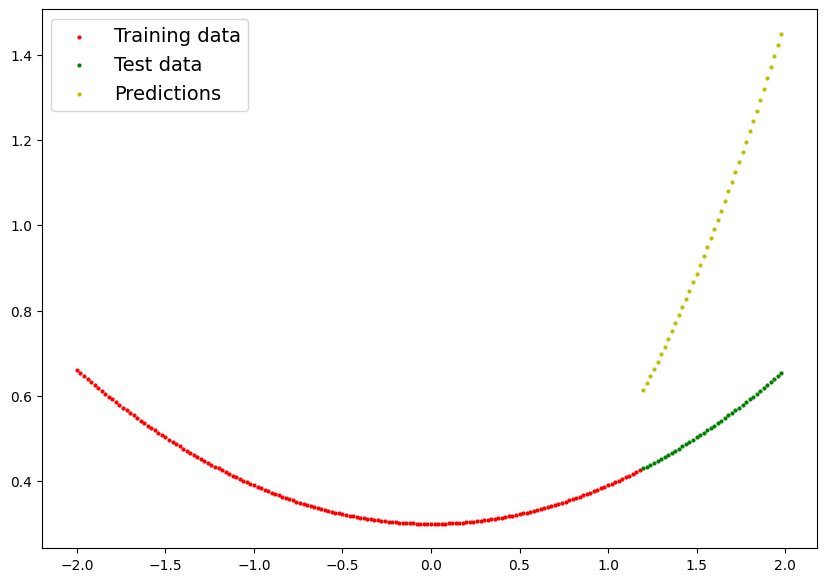

In [18]:
plot_predictions(predictions=y_preds)

In [19]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

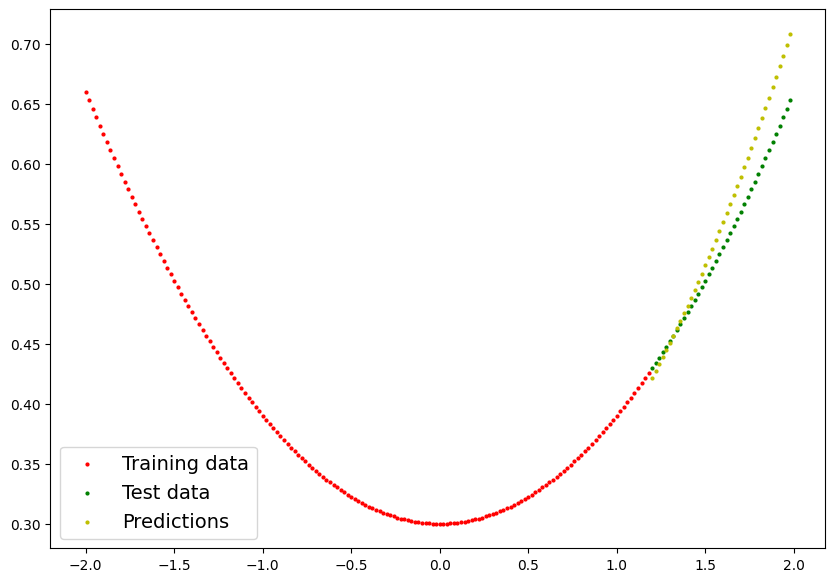

In [20]:
plot_predictions(predictions=y_preds_new)

In [21]:
from pathlib import Path

# 1. create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create a model save path
MODEL_NAME = "chapter_1_practice_1_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(MODEL_SAVE_PATH)

# 3. save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

models\chapter_1_practice_1_model_0.pth
Saving model to: models\chapter_1_practice_1_model_0.pth


In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.1156])), ('bias', tensor([0.2553]))])

In [23]:
loaded_model_0 = LinearRegressionModel()
print(loaded_model_0.state_dict())

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])


<All keys matched successfully>

In [24]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.1156])), ('bias', tensor([0.2553]))])

In [25]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    
loaded_model_preds

tensor([[0.4218],
        [0.4273],
        [0.4330],
        [0.4388],
        [0.4447],
        [0.4507],
        [0.4567],
        [0.4629],
        [0.4691],
        [0.4754],
        [0.4819],
        [0.4884],
        [0.4950],
        [0.5017],
        [0.5085],
        [0.5154],
        [0.5224],
        [0.5294],
        [0.5366],
        [0.5439],
        [0.5512],
        [0.5587],
        [0.5662],
        [0.5738],
        [0.5815],
        [0.5894],
        [0.5973],
        [0.6053],
        [0.6133],
        [0.6215],
        [0.6298],
        [0.6382],
        [0.6466],
        [0.6552],
        [0.6638],
        [0.6726],
        [0.6814],
        [0.6903],
        [0.6993],
        [0.7085]])

In [26]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
  
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])